<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import Layout
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML
from IPython.display import clear_output

In [3]:
import sim

In [4]:
def plotLines(val, df):
    ax = plt.gca()
    ddf = df[ df["nrI"]==val]
    X = ddf["p0"]
    Y1 = ddf["nE"]
    Y2 = ddf["nI"]
    ax.plot(X,Y1, "-o") 
    ax.plot(X,Y2, "-o")
    title = "Exp = 1000 vs. Inexp = " + str(val)
    ax.set_title(title, fontsize=8)
    ax.set_xlabel(r"$p_0$", fontsize=8)
    ax.set_ylabel("Cum Survival", fontsize=8)
    ax.legend(["E", "I"])
    
def plotLinesTime(df, prob):
    ax = plt.gca()
    ddf = df[ df["p0"] == prob]
    X = ddf["t"]
    Y1 = ddf["nE"]
    Y2 = ddf["nI"]
    ax.plot(X,Y1, "-o") 
    Y2 = Y2[1:]
    X  = X[1:]
    ax.plot(X,Y2, "-o")
    title = "Exp = 1000 vs. Inexp = " + str(int(ddf.iloc[0][3]))
    ax.set_title(title, fontsize=8)
    lab = r"time ($p^0$ = " + str(prob) + ")"
    ax.set_xlabel(lab, fontsize=8)
    ax.set_ylabel("Cum Survival", fontsize=8)
    ax.set_xticks(np.arange(0, periods.value, 1))
    ax.legend(["E", "I"])

def on_buttonSel_clicked(b):
    ff.value = 0
    fig = plt.gcf()
    plt.clf()
    # count nr of checkbox
    nr = 0
    selection = []
    for cb in checkboxes:
        if cb.value == True:
            selection.append(int(cb.description))
    if cbType.value == True: # run old version
        df = sim.runSim(nESet, selection, alpha.value, periods.value, deltaE.value, deltaI.value, ff, ddP.value, pNewE.value, pNewI.value)
        nr = len(selection)
        if nr == 4:
            gs = gridspec.GridSpec(2,2)
            row = 0
            col = 0
            for nn in selection:
                ax=plt.subplot(gs[row,col])
                plotLines(nn,df)
                if col == 0:
                    col += 1
                else:
                    row += 1
                    col = 0
        else:
            nrows = int(np.ceil(nr/3))
            ncols = min(nr, 3)
            gs = gridspec.GridSpec(nrows,ncols)
            gs.update(wspace=0.5,hspace=0.5)
            i = 0
            j = 0
            for nn in selection:
                ax=plt.subplot(gs[i,j])
                plotLines(nn, df)
                if j < 2:
                    j += 1
                else:
                    i += 1
                    j = 0
        with out:
            clear_output()
            display(df)
    else: # cbType == False, run with two p0 values only
        df = sim.runSimTime(nESet, selection, alpha.value, periods.value, deltaE.value, deltaI.value, ff, dd1.value, dd2.value, ddP.value, pNewE.value, pNewI.value)
        gs = gridspec.GridSpec(1,2)
        gs.update(wspace=0.5,hspace=0.5)
        ax = plt.subplot(gs[0,0])
        plotLinesTime(df, dd1.value)
        ax = plt.subplot(gs[0,1])
        plotLinesTime(df, dd2.value)
        with out:
            clear_output()
            display(df)

def on_buttonAll_clicked(b):
    ff.value = 0
    fig = plt.gcf()
    plt.clf()
    df = sim.runSim(nESet, nN, alpha.value, periods.value, deltaE.value, deltaI.value,ff, ddP.value, pNewE.value, pNewI.value)

    gs = gridspec.GridSpec(2,3)
    gs.update(hspace=0.5, wspace=0.5)
    i = 0
    j = 0
    for nn in nN:
        ax=plt.subplot(gs[i,j])
        plotLines(nn, df)
        if j < 2:
            j += 1
        else:
            i += 1
            j = 0
    with out:
        clear_output()
        display(df)

def on_ddP_change(b):
    pL = np.arange(ddP.value-lengthProb*stepProb,ddP.value,stepProb)
    pLower = [round(i,2) for i in pL]
    dd1.options=pLower
    dd1.value=pLower[0]
    pH = np.arange(ddP.value+stepProb,ddP.value+(lengthProb+1)*stepProb,stepProb)
    pHigher = [round(i,2) for i in pH]
    dd2.options=pHigher
    dd2.value=pHigher[-1]


<IPython.core.display.Javascript object>


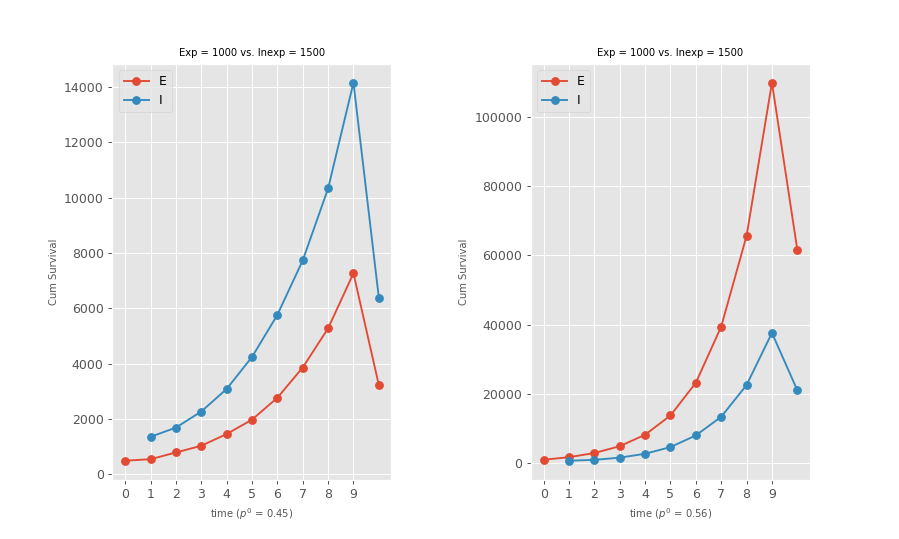

NEW E and I are  1.2 1.2
NEW E and I are  2.0 2.0
NEW E and I are  2.0 2.0
NEW E and I are  2.0 2.0


In [5]:
%matplotlib notebook
#%matplotlib inline
df = None
nESet = [1000]
ratio = [0.8, 0.9, 1.0, 1.1, 1.2, 1.5]
nN = [int(rr*nESet[0]) for rr in ratio]
box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='solid',
                    width='100%')

# area 1 : parameters with sliders
capParam = widgets.Label(value='Select Parameters Value', textsize=20, layout=Layout(width='50%', height='20px'))
alpha=widgets.FloatSlider(description=r'\(\alpha\)', value=0.8, min=0.0, max=1.0, tooltip="Bayes update")
deltaE=widgets.FloatSlider(description=r'\(\delta^E\)', value=0.8, min=0.5, max=1.5)
deltaI=widgets.FloatSlider(description=r'\(\delta^I\)', value=1.2, min=0.5, max=1.5)
periods = widgets.IntSlider(description="Nr. Periods", value=5, min=2, max=10)
slidersTop = widgets.HBox([alpha,deltaE, deltaI,periods])
capNewEntrants = widgets.Label(value='Proportion of New Entrants in Each Period', textsize=20, layout=Layout(width='50%', height='20px'))
pNewE = widgets.FloatSlider(description=r'\(p^E\)', value=1.2, min=0.0, max=3.0)
pNewI = widgets.FloatSlider(description=r'\(p^I\)', value=1.2, min=0.0, max=3.0)
slidersBottom = widgets.HBox([pNewE,pNewI])
paramContainer = widgets.VBox([capParam,slidersTop,capNewEntrants,slidersBottom],layout=box_layout)

# area 2 : high and low probabilities
capProb = widgets.Label(value='Select Probabilities Value', textsize=20, layout=Layout(width='50%', height='30px'))
ddP = widgets.FloatSlider(description='Threshold', value=0.2, min=0.1, max=1.0)
stepProb = 0.01
lengthProb = 5
pL = np.arange(ddP.value-lengthProb*stepProb,ddP.value,stepProb)
pLower = [round(i,2) for i in pL]
dd1 = widgets.Dropdown(
    options=pLower,
    value=pLower[0],
    description='Lower ',
    disabled=False,
)
pH = np.arange(ddP.value+stepProb,ddP.value+(lengthProb+1.0)*stepProb,stepProb)
pHigher = [round(i,2) for i in pH]
dd2 = widgets.Dropdown(
    options=pHigher,
    value=pHigher[-1],
    description='Higher ',
    disabled=False,
)
cbType=widgets.Checkbox(
    value=False,
    description="Old Version ",
    disabled=False)

probs = widgets.HBox([dd1,dd2,ddP,cbType])
probsAll = widgets.VBox([capProb,probs],layout=Layout(height="70px"))


# area 3 : inexperienced categories (checkboxes)
caption = widgets.Label(value='Select Nr. of Inexperienced [Experienced = 1000]', layout=Layout(width='100%', height='25px',right="True"))
checkboxes = []
for n in nN:
    checkboxes.append(widgets.Checkbox(
    value=False,
    description=str(n),
    disabled=False
    ))
contCB = widgets.HBox([cb for cb in checkboxes])
contIn = widgets.VBox([caption,contCB])

# area 4 : buttons
buttonAll = widgets.Button(description="Run Simulation All")
buttonSel = widgets.Button(description="Run Simulation Selection")
ff = widgets.FloatProgress(min=0, max=10,description="\t Progress ", layout=Layout(width='70%', height='20px')) # instantiate the bar
contButtons = widgets.HBox([buttonAll, buttonSel,ff])

# container for the three areas 
contAll = widgets.VBox([paramContainer,probsAll, contIn,contButtons])
display(contAll)

#setup picture area
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))
plt.show()
buttonAll.on_click(on_buttonAll_clicked)
buttonSel.on_click(on_buttonSel_clicked)
ddP.observe(on_ddP_change)
plt.show()

# management of output area for table
out = widgets.Output()
contChart = widgets.VBox([]) 
contTable = widgets.VBox([out]) 

tab_contents = ['Chart', 'Table']
children = [contChart,contTable]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, tab_contents[i])
display(tab)